In [2]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
cred_app_df.shape

(95964, 121)

## Data Cleaning

In [4]:
cred_app_df.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,type_suite_name,income_type_name,education_type_name,family_status_name,housing_type_name,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,age_own_car,mobile_flag,employee_phone_flag,work_phone_flag,mobile_contact_flag,phone_flag,email_flag,type_of_occupation,family_members__count,rating_client_region,rating_client_w_city_region,start_weekday_appr_process,hour_of_approval_process_start,not_live_region_reg_region,not_work_region_reg_region,living_region_not_work_region_flag,not_live_city_reg_city,not_work_city_reg_city,living_city_not_work_city_flag,type_of_organization,external_source_1,external_source_2,external_source_3,average_apartments,average_basementarea,average_years_beginexpluatation,average_years_building,average_commonarea,average_elevator_count,average_entrance_count,average_max_floors,average_min_floors,average_land_area,average_living_apartments,average_living_area,non_living_apartments_av,non_living_area_avg,mode_apartments,mode_basementarea,mode_years_beginexpluatation,mode_years_building,mode_commonarea,mode_elevator_count,mode_entrance_count,mode_max_floors,mode_min_floors,mode_land_area,mode_living_apartments,mode_living_area,non_living_apartments_mode,non_living_area_mode,median_apartments,median_basementarea,median_years_beginexpluatation,median_years_building,median_commonarea,median_elevator_count,median_entrance_count,median_max_floors,median_min_floors,median_land_area,median_living_apartments,median_living_area,non_living_apartments_medi,non_living_area_medi,fondkapremon_mode,mode_house_type,mode_total_area,mode_walls_material,emergency_state_mode,observes_30_count_social_circle,social_circle_defaults_30_days,observes_60_count_social_circle,social_circle_defaults_60_days,last_phone_number_change,document_2_flag,document_3_flag,document_4_flag,document_5_flag,document_6_flag,document_7_flag,document_8_flag,document_9_flag,document_10_flag,document_11_flag,document_12_flag,document_13_flag,document_14_flag,document_15_flag,document_16_flag,document_17_flag,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-14710,-7960,-6846.0,-4535,3.0,1,1,0,1,0,0,Drivers,2.0,1,1,WEDNESDAY,14,0,0,0,0,1,1,Transport: type 4,0.000000,0.439018,0.707699,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,NaN,NaN,0.0000,NaN,NaN,0.0,0.0,0.0,0.0,-420.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007114,-15245,-1939,-679.0,-5801,0.0,1,1,1,1,1,0,Sales staff,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Other,0.000000,0.262936,0.554947,0.0124,0.0,0.9786,0.7076,0.0020,0.0,0.1034,0.0417,0.0833,0.0,0.0101,0.0101,0.0,0.0,0.0126,0.0,0.9786,0.7190,0.0020,0.0,0.1034,0.0417,0.0833,0.0,0.011,0.0105,0.0,0.0,0.0125,0.0,0.9786,0.7115,0.0020,0.0,0.1034,0.0417,0.0833,0.0,0.0103,0.0103,0.0,0.0,reg oper spec account,block of flats,0.0090,Wooden,No,1.0,0.0,1.0,0.0,-433.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.046220,-19863,-4465,-2377.0,-2377,20.0,1,1,1,1,0,0,Drivers,2.0,1,1,MONDAY,13,0,0,0,0,0,0,S

In [5]:
# cred_app_df.columns.tolist()
# cred_app_df.dtypes
cred_app_df.describe()

,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,age_own_car,mobile_flag,employee_phone_flag,work_phone_flag,mobile_contact_flag,phone_flag,email_flag,family_members__count,rating_client_region,rating_client_w_city_region,hour_of_approval_process_start,not_live_region_reg_region,not_work_region_reg_region,living_region_not_work_region_flag,not_live_city_reg_city,not_work_city_reg_city,living_city_not_work_city_flag,external_source_1,external_source_2,external_source_3,average_apartments,average_basementarea,average_years_beginexpluatation,average_years_building,average_commonarea,average_elevator_count,average_entrance_count,average_max_floors,average_min_floors,average_land_area,average_living_apartments,average_living_area,non_living_apartments_av,non_living_area_avg,mode_apartments,mode_basementarea,mode_years_beginexpluatation,mode_years_building,mode_commonarea,mode_elevator_count,mode_entrance_count,mode_max_floors,mode_min_floors,mode_land_area,mode_living_apartments,mode_living_area,non_living_apartments_mode,non_living_area_mode,median_apartments,median_basementarea,median_years_beginexpluatation,median_years_building,median_commonarea,median_elevator_count,median_entrance_count,median_max_floors,median_min_floors,median_land_area,median_living_apartments,median_living_area,non_living_apartments_medi,non_living_area_medi,mode_total_area,observes_30_count_social_circle,social_circle_defaults_30_days,observes_60_count_social_circle,social_circle_defaults_60_days,last_phone_number_change,document_2_flag,document_3_flag,document_4_flag,document_5_flag,document_6_flag,document_7_flag,document_8_flag,document_9_flag,document_10_flag,document_11_flag,document_12_flag,document_13_flag,document_14_flag,document_15_flag,document_16_flag,document_17_flag,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
count,95964.000000,9.596400e+04,9.596400e+04,95964.000000,9.596400e+04,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.0,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.0,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.0,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000,95964.000000
mean,0.430547,1.702946e+05,5.991149e+05,27078.061252,5.378899e+05,0.020597,-16136.581854,64266.267809,-4993.245603,-3050.251438,4.239090,1.0,0.818442,0.196949,0.999323,0.286597,0.058678,2.173690,2.062242,2.042089,12.041516,0.013297,0.048185,0.039588,0.074288,0.226939,0.178734,0.225130,0.515227,0.475743,0.057044,0.036286,0.500329,0.250730,0.013109,0.035660,0.074228,0.112134,0.073740,0.026707,0.031379,0.052708,0.002664,0.012456,0.055476,0.035923,0.500005,0.253127,0.012528,0.033629,0.072006,0.110177,0.072546,0.026183,0.032970,0.052088,0.002476,0.011951,0.057257,0.036089,0.500337,0.25183

In [6]:
cred_app_df = cred_app_df[['reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
#  'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
#  'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
#  'start_weekday_appr_process',
#  'hour_of_approval_process_start',
#  'not_live_region_reg_region',
#  'not_work_region_reg_region',
#  'living_region_not_work_region_flag',
#  'not_live_city_reg_city',
#  'not_work_city_reg_city',
#  'living_city_not_work_city_flag',
#  'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
#  'average_apartments',
#  'average_basementarea',
#  'average_years_beginexpluatation',
#  'average_years_building',
#  'average_commonarea',
#  'average_elevator_count',
#  'average_entrance_count',
#  'average_max_floors',
#  'average_min_floors',
#  'average_land_area',
#  'average_living_apartments',
#  'average_living_area',
#  'non_living_apartments_av',
#  'non_living_area_avg',
#  'mode_apartments',
#  'mode_basementarea',
#  'mode_years_beginexpluatation',
 'mode_years_building',
#  'mode_commonarea',
#  'mode_elevator_count',
#  'mode_entrance_count',
#  'mode_max_floors',
#  'mode_min_floors',
 'mode_land_area',
#  'mode_living_apartments',
#  'mode_living_area',
#  'non_living_apartments_mode',
#  'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
#  'non_living_apartments_medi',
#  'non_living_area_medi',
#  'fondkapremon_mode',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
#  'document_2_flag',
#  'document_3_flag',
#  'document_4_flag',
#  'document_5_flag',
#  'document_6_flag',
#  'document_7_flag',
#  'document_8_flag',
#  'document_9_flag',
#  'document_10_flag',
#  'document_11_flag',
#  'document_12_flag',
#  'document_13_flag',
#  'document_14_flag',
#  'document_15_flag',
#  'document_16_flag',
#  'document_17_flag',
#  'document_18_flag',
#  'document_19_flag',
#  'document_20_flag',
#  'document_21_flag',
#  'requests_bki_hour',
#  'requests_bki_day',
#  'requests_bki_week',
#  'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [7]:
cred_app_df.isna().sum()

reco_id_curr                           0
contract_type_name                     0
gender                                 0
own_car_flag                           0
own_realty_flag                        0
children_count                         0
income                                 0
loan_body                              0
annuity_payment                        0
goods_price                            0
type_suite_name                      267
income_type_name                       0
education_type_name                    0
family_status_name                     0
housing_type_name                      0
population_relative_region             0
days_birth                             0
days_employed                          0
registration_timestamp                 0
publication_timestamp                  0
age_own_car                            0
mobile_flag                            0
employee_phone_flag                    0
mobile_contact_flag                    0
phone_flag      

In [8]:
target_df = pd.read_csv('dataset/DATASET_TARGET.csv')
target_df.shape

(95964, 2)

In [9]:
cred_app_target_df = cred_app_df.merge(target_df, on='reco_id_curr', how='left')

In [10]:
cred_app_target_df.loc[cred_app_target_df.duplicated()]

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,type_suite_name,income_type_name,education_type_name,family_status_name,housing_type_name,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,age_own_car,mobile_flag,employee_phone_flag,mobile_contact_flag,phone_flag,type_of_occupation,family_members__count,rating_client_region,rating_client_w_city_region,external_source_1,external_source_2,external_source_3,mode_years_building,mode_land_area,median_apartments,median_basementarea,median_years_beginexpluatation,median_years_building,median_commonarea,median_elevator_count,median_entrance_count,median_max_floors,median_min_floors,median_land_area,median_living_apartments,median_living_area,mode_house_type,mode_total_area,mode_walls_material,emergency_state_mode,observes_30_count_social_circle,social_circle_defaults_30_days,observes_60_count_social_circle,social_circle_defaults_60_days,last_phone_number_change,requests_bki_qrt,requests_bki_year,target


## Feature Understanding

### Univariate Analysis

Text(0, 0.5, 'count')

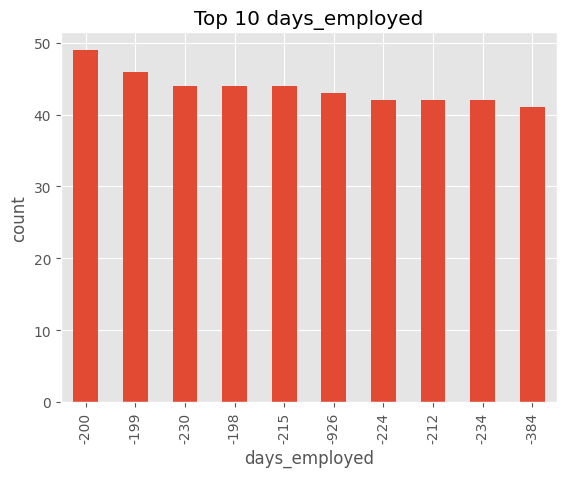

In [11]:
ax = cred_app_target_df[cred_app_target_df['days_employed']<=0]['days_employed'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top 10 days_employed')
ax.set_xlabel('days_employed')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

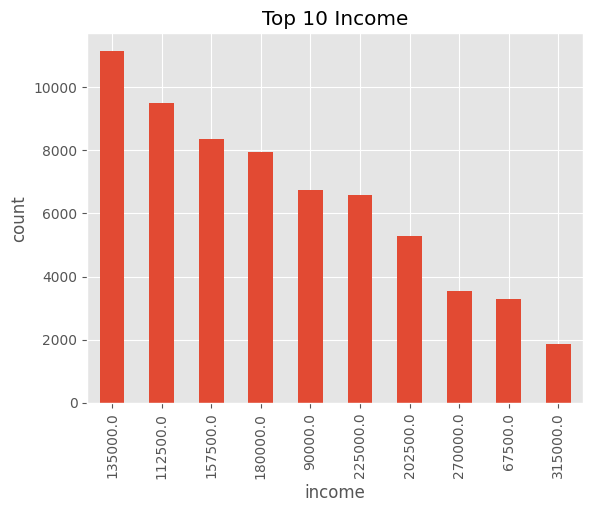

In [12]:
ax = cred_app_target_df['income'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top 10 Income')
ax.set_xlabel('income')
ax.set_ylabel('count')

<Axes: title={'center': 'Days Employed Distribution'}, ylabel='Frequency'>

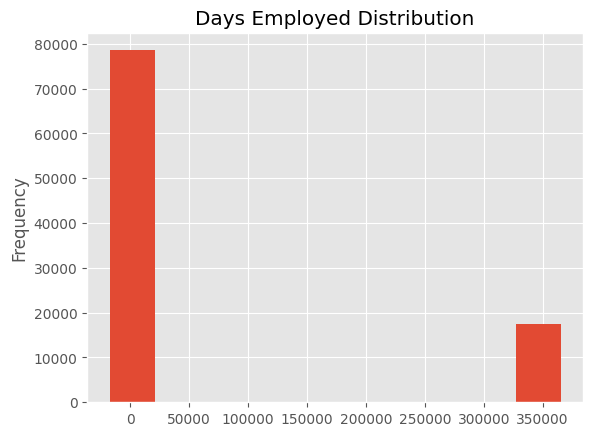

In [13]:
cred_app_target_df['days_employed'].plot(kind='hist', title='Days Employed Distribution')

<Axes: title={'center': 'Days Emplyed Cleaned'}, ylabel='Frequency'>

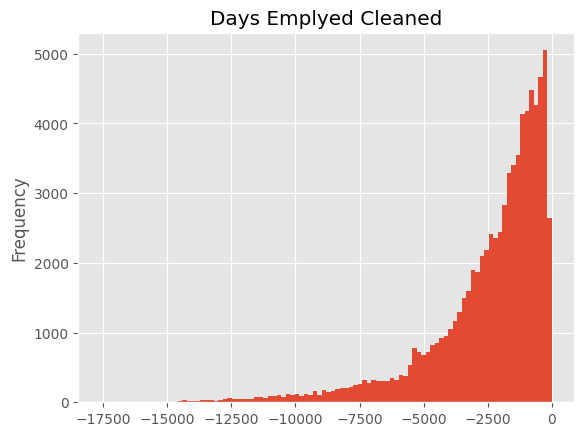

In [14]:
cred_app_target_df[cred_app_target_df['days_employed'] < 50000]['days_employed'].plot(kind='hist', bins=100, title='Days Employed Cleaned')

<Axes: title={'center': 'Will Work 1000 Years Later'}, ylabel='Frequency'>

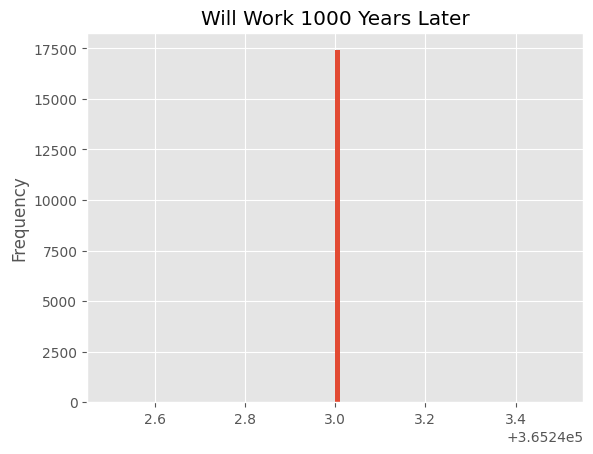

In [15]:
cred_app_target_df[cred_app_target_df['days_employed'] == 365243]['days_employed'].plot(kind='hist', bins=100, title='Will Work 1000 Years Later')

In [16]:
print(cred_app_target_df[cred_app_target_df['days_employed'] < 365243]['days_employed'].count())
print(cred_app_target_df[cred_app_target_df['days_employed'] == 365243]['days_employed'].value_counts())

78547
365243    17417
Name: days_employed, dtype: int64


135000.0    11153
112500.0     9507
157500.0     8374
180000.0     7956
90000.0      6737
            ...  
118048.0        1
228861.0        1
59850.0         1
199800.0        1
81243.0         1
Name: income, Length: 829, dtype: int64


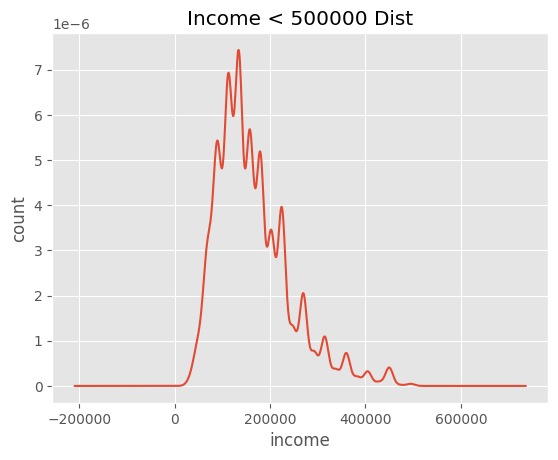

In [17]:
ax = cred_app_target_df[cred_app_target_df['income']<500000]['income'].plot(kind='kde', title='Income < 500000 Dist')
ax.set_xlabel('income')
ax.set_ylabel('count')
print(cred_app_target_df[cred_app_target_df['income']<500000]['income'].value_counts())

### Feature Relationship

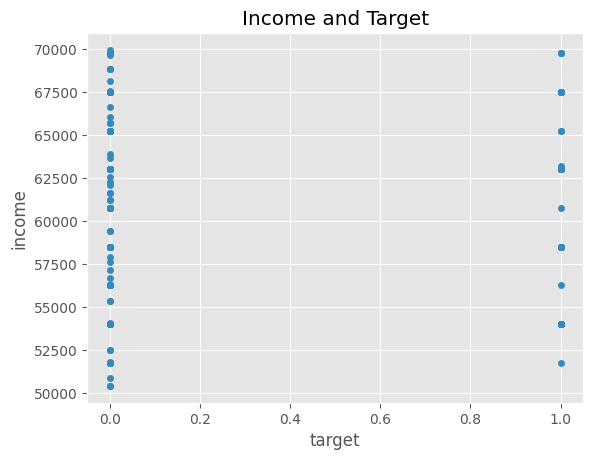

In [18]:
cred_app_target_df[(cred_app_target_df['days_employed'] <= 0)\
                    & (cred_app_target_df['income'] >= 50000)\
                    & (cred_app_target_df['income'] < 70000)].plot(kind='scatter',
                        x='target',
                        y='income',
                        title='Income and Target')
plt.show()

In [21]:
cred_app_df.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,type_suite_name,income_type_name,education_type_name,family_status_name,housing_type_name,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,age_own_car,mobile_flag,employee_phone_flag,mobile_contact_flag,phone_flag,type_of_occupation,family_members__count,rating_client_region,rating_client_w_city_region,external_source_1,external_source_2,external_source_3,mode_years_building,mode_land_area,median_apartments,median_basementarea,median_years_beginexpluatation,median_years_building,median_commonarea,median_elevator_count,median_entrance_count,median_max_floors,median_min_floors,median_land_area,median_living_apartments,median_living_area,mode_house_type,mode_total_area,mode_walls_material,emergency_state_mode,observes_30_count_social_circle,social_circle_defaults_30_days,observes_60_count_social_circle,social_circle_defaults_60_days,last_phone_number_change,requests_bki_qrt,requests_bki_year
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-14710,-7960,-6846.0,-4535,3.0,1,1,1,0,Drivers,2.0,1,1,0.000000,0.439018,0.707699,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,0.0,0.0,0.0,0.0,-420.0,0.0,1.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007114,-15245,-1939,-679.0,-5801,0.0,1,1,1,1,Sales staff,2.0,2,2,0.000000,0.262936,0.554947,0.7190,0.0,0.0125,0.0,0.9786,0.7115,0.0020,0.0,0.1034,0.0417,0.0833,0.0,0.0103,0.0103,block of flats,0.0090,Wooden,No,1.0,0.0,1.0,0.0,-433.0,0.0,1.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.046220,-19863,-4465,-2377.0,-2377,20.0,1,1,1,0,Drivers,2.0,1,1,0.000000,0.736970,0.000000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,2.0,0.0,2.0,0.0,-1584.0,1.0,0.0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.015221,-11846,-2796,-4968.0,-3940,0.0,1,1,1,0,Sales staff,4.0,2,2,0.000000,0.449264,0.529890,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,10.0,0.0,10.0,0.0,0.0,0.0,0.0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.022800,-9942,-500,-3354.0,-2605,0.0,1,1,1,0,Sales staff,3.0,2,2,0.359152,0.019802,0.187389,0.7583,0.0,0.0000,0.0,0.9816,0.7518,0.0023,0.0,0.0690,0.0417,0.0833,0.0,0.0000,0.0157,block of flats,0.0134,Wooden,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0


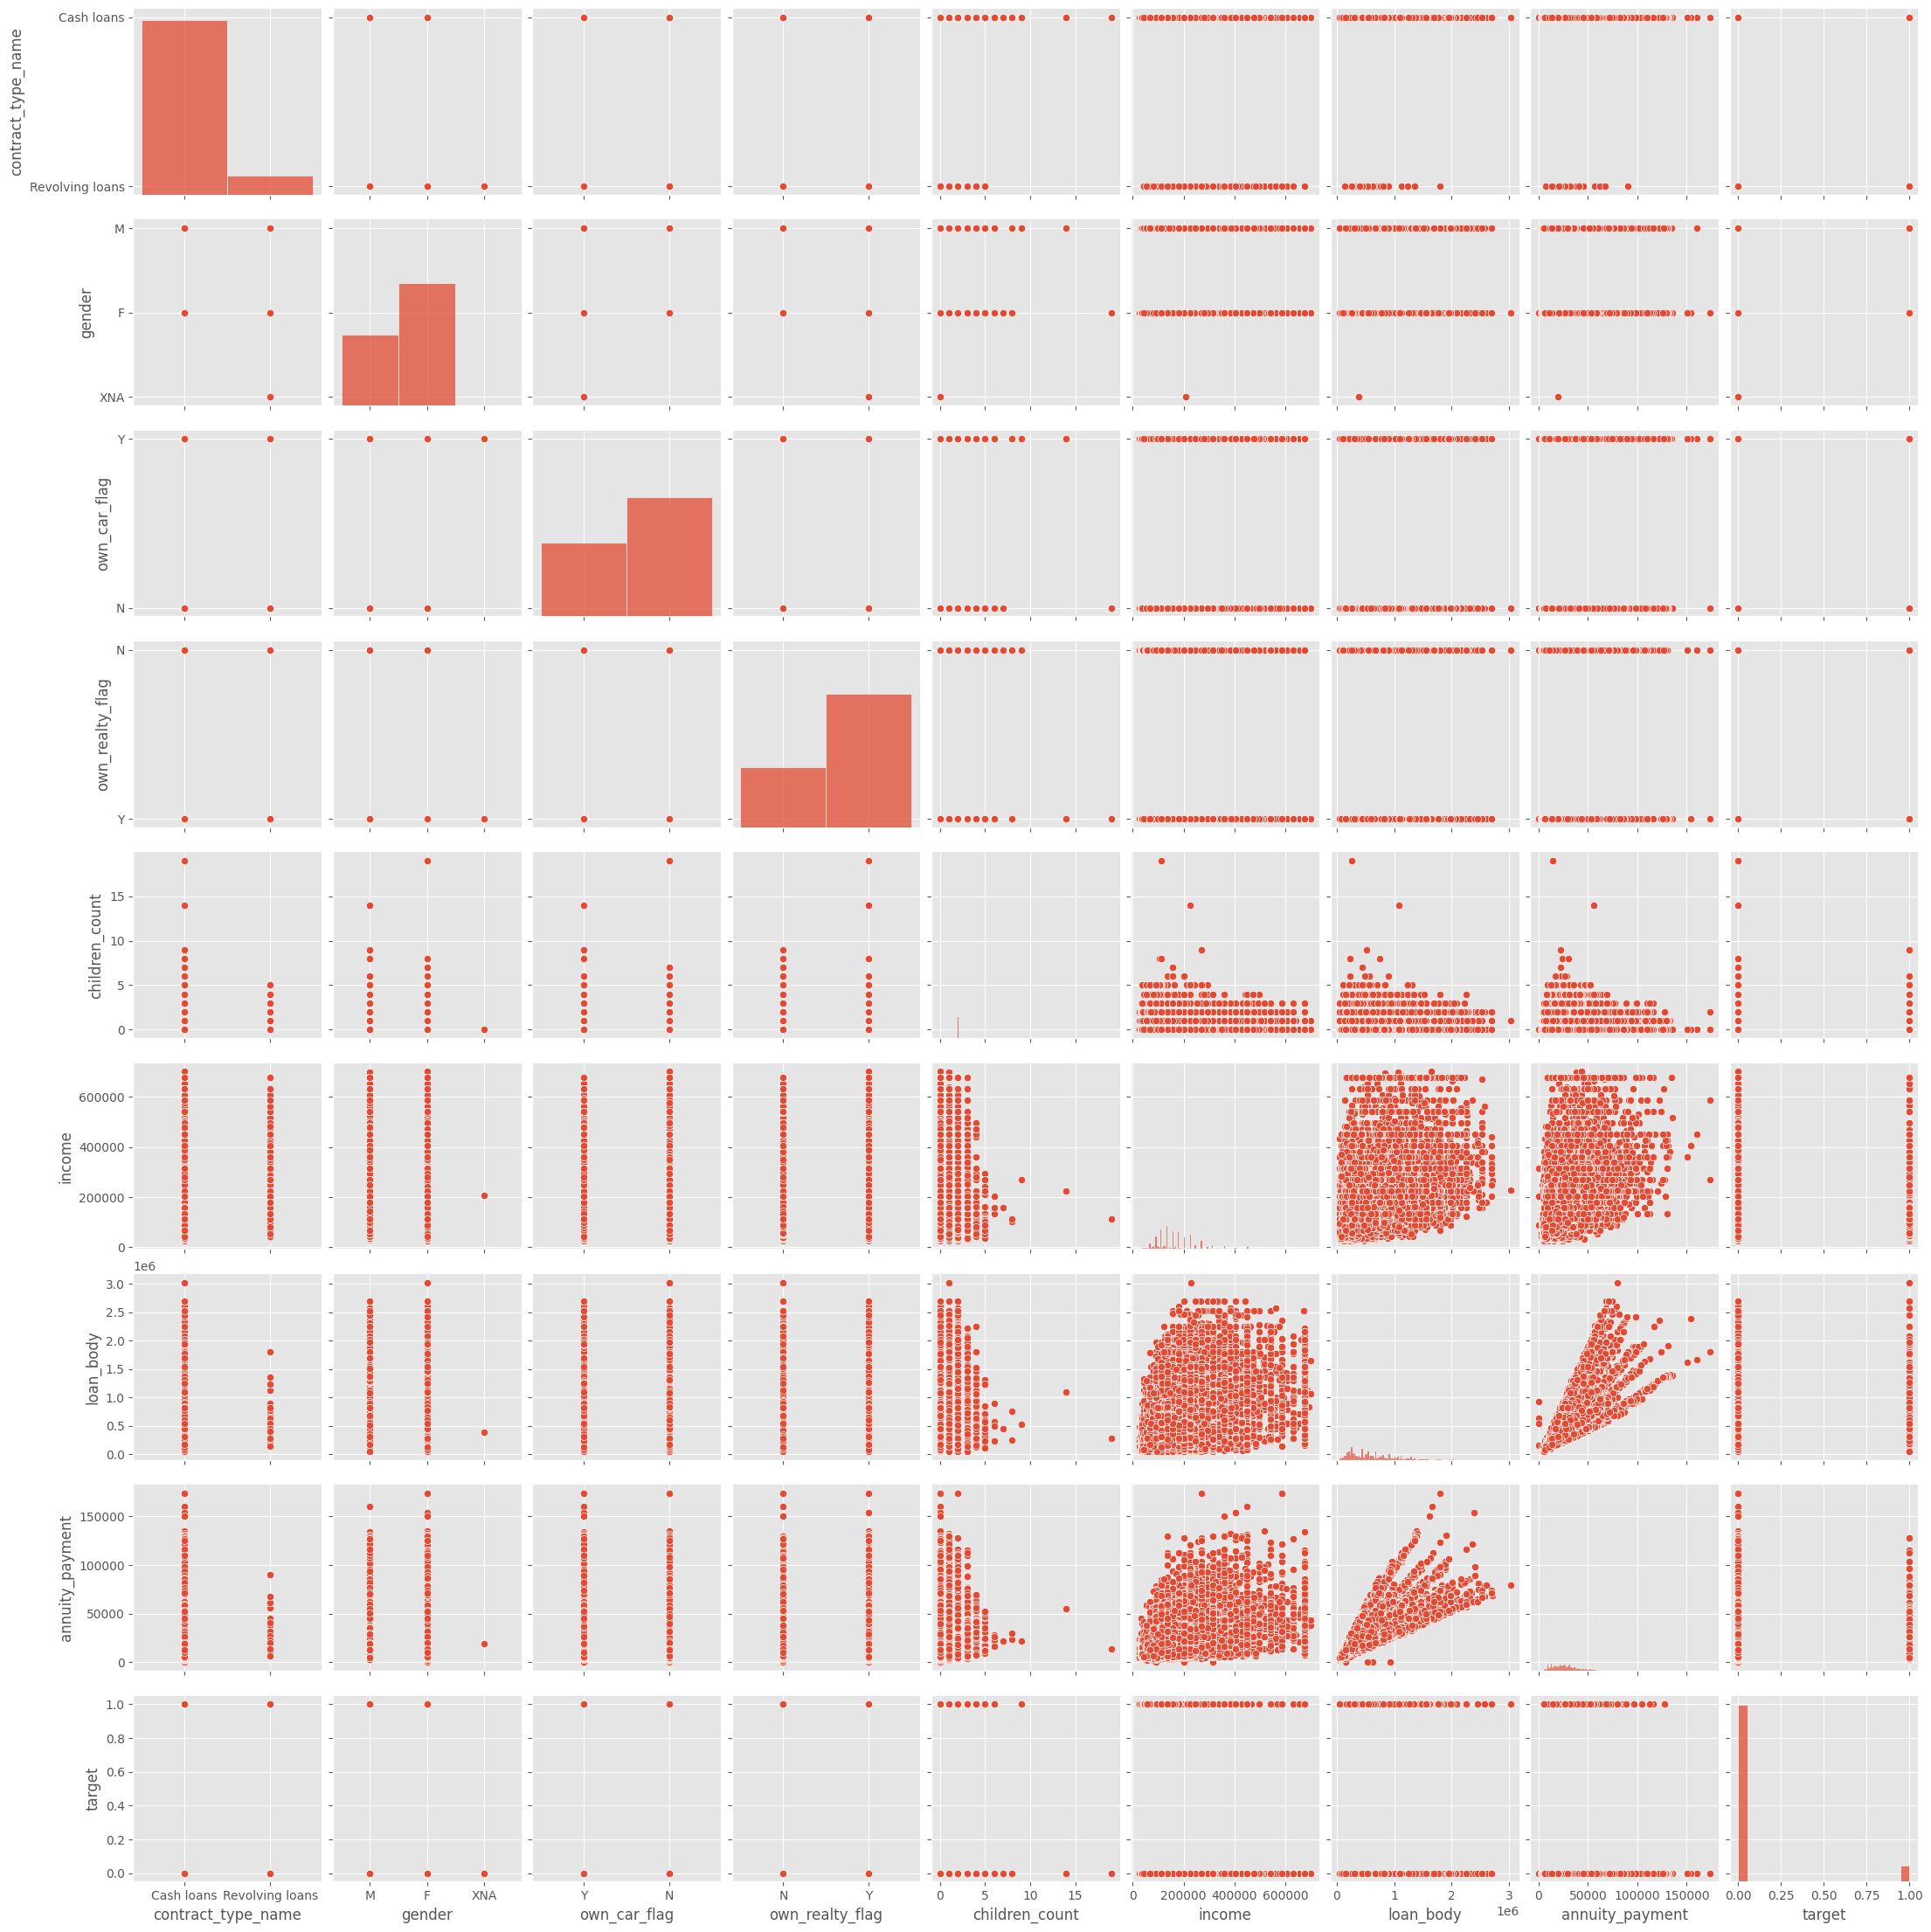

In [23]:
sns.pairplot(cred_app_target_df[(cred_app_target_df['income'] < 700000)\
                                & (cred_app_target_df['days_employed']<=0)], 
                                vars=['contract_type_name', 'gender', 'own_car_flag', 'own_realty_flag',
                                      'children_count', 'income', 'loan_body', 'annuity_payment',
                                      'target'])
plt.show()

In [33]:
cred_app_df.head()

,reco_id_curr,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,goods_price,type_suite_name,income_type_name,education_type_name,family_status_name,housing_type_name,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,age_own_car,mobile_flag,employee_phone_flag,mobile_contact_flag,phone_flag,type_of_occupation,family_members__count,rating_client_region,rating_client_w_city_region,external_source_1,external_source_2,external_source_3,mode_years_building,mode_land_area,median_apartments,median_basementarea,median_years_beginexpluatation,median_years_building,median_commonarea,median_elevator_count,median_entrance_count,median_max_floors,median_min_floors,median_land_area,median_living_apartments,median_living_area,mode_house_type,mode_total_area,mode_walls_material,emergency_state_mode,observes_30_count_social_circle,social_circle_defaults_30_days,observes_60_count_social_circle,social_circle_defaults_60_days,last_phone_number_change,requests_bki_qrt,requests_bki_year
0,250865db9679b963f8053cea33eb0f86,Cash loans,M,Y,N,0,180000.0,953460.0,66357.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-14710,-7960,-6846.0,-4535,3.0,1,1,1,0,Drivers,2.0,1,1,0.000000,0.439018,0.707699,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,0.0,0.0,0.0,0.0,-420.0,0.0,1.0
1,73e474ce3790236a26bb05cc806b254d,Cash loans,F,N,N,0,85500.0,381528.0,14512.5,315000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007114,-15245,-1939,-679.0,-5801,0.0,1,1,1,1,Sales staff,2.0,2,2,0.000000,0.262936,0.554947,0.7190,0.0,0.0125,0.0,0.9786,0.7115,0.0020,0.0,0.1034,0.0417,0.0833,0.0,0.0103,0.0103,block of flats,0.0090,Wooden,No,1.0,0.0,1.0,0.0,-433.0,0.0,1.0
2,bbead8b3dd56a68ac6744d0028aca009,Cash loans,M,Y,Y,0,405000.0,1006920.0,42660.0,900000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.046220,-19863,-4465,-2377.0,-2377,20.0,1,1,1,0,Drivers,2.0,1,1,0.000000,0.736970,0.000000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,2.0,0.0,2.0,0.0,-1584.0,1.0,0.0
3,ece1f89b0bfae8748f44c138346ad267,Cash loans,F,N,Y,2,81000.0,286704.0,15682.5,247500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.015221,-11846,-2796,-4968.0,-3940,0.0,1,1,1,0,Sales staff,4.0,2,2,0.000000,0.449264,0.529890,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,NaN,0.0000,NaN,NaN,10.0,0.0,10.0,0.0,0.0,0.0,0.0
4,16a5efff61d95fd7f8de14d186a69c01,Cash loans,F,N,Y,2,99000.0,450000.0,30573.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.022800,-9942,-500,-3354.0,-2605,0.0,1,1,1,0,Sales staff,3.0,2,2,0.359152,0.019802,0.187389,0.7583,0.0,0.0000,0.0,0.9816,0.7518,0.0023,0.0,0.0690,0.0417,0.0833,0.0,0.0000,0.0157,block of flats,0.0134,Wooden,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='income', ylabel='education_type_name'>

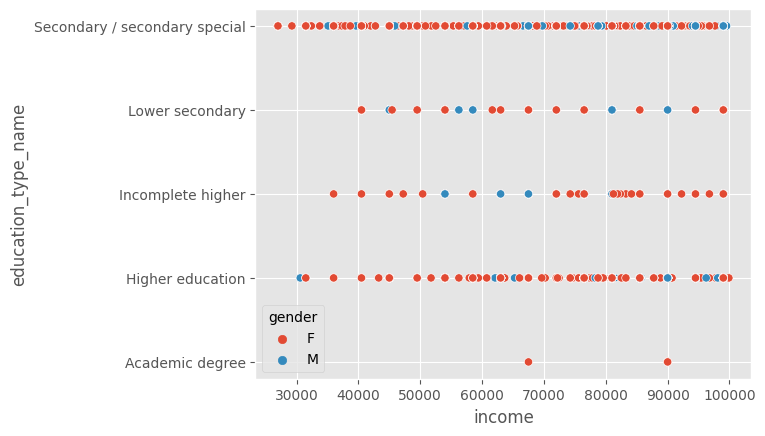

In [58]:
sns.scatterplot(x='income',
                y='education_type_name',
                hue='gender',
                data=cred_app_target_df[ (cred_app_target_df['income'] < 100000)\
                    & (cred_app_target_df['days_employed']<=0)\
                    & (cred_app_target_df['gender']!='XNA')
                    ])

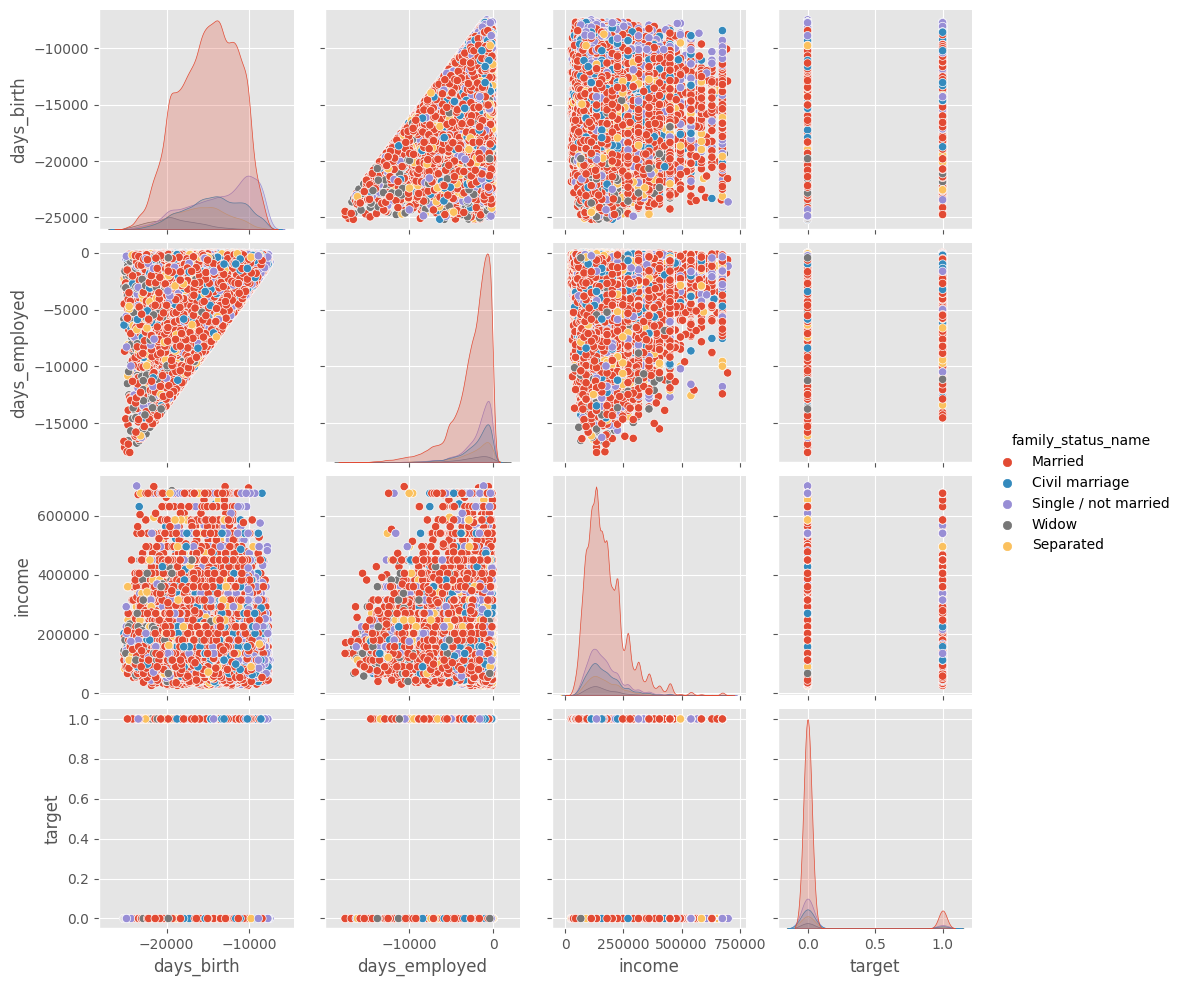

In [66]:
sns.pairplot(cred_app_target_df[(cred_app_target_df['income'] < 700000)\
                              & (cred_app_target_df['days_employed']<=0)], 
                              vars=['days_birth', 'days_employed', 'income', 'target'],
                              hue='family_status_name')
plt.show()

In [72]:
cred_app_target_df_filtered = cred_app_target_df[(cred_app_target_df['income'] < 700000)\
                            & (cred_app_target_df['days_employed']<=0)\
                            & (cred_app_target_df['gender']!='XNA')]

cred_app_target_df_corr = cred_app_target_df_filtered[['days_birth', 'gender', 'education_type_name', 'family_status_name', 'children_count', 'days_employed', 'income', 'target']].dropna().corr()
cred_app_target_df_corr

/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_58140/358083466.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cred_app_target_df_corr = cred_app_target_df_filtered[['days_birth', 'gender', 'education_type_name', 'family_status_name', 'children_count', 'days_employed', 'income', 'target']].dropna().corr()


,days_birth,children_count,days_employed,income,target
days_birth,1.000000,0.256854,0.346663,-0.051889,0.064023
children_count,0.256854,1.000000,0.067534,-0.015756,0.011473
days_employed,0.346663,0.067534,1.000000,-0.024398,0.074268
income,-0.051889,-0.015756,-0.024398,1.000000,-0.025573
target,0.064023,0.011473,0.074268,-0.025573,1.000000


<Axes: >

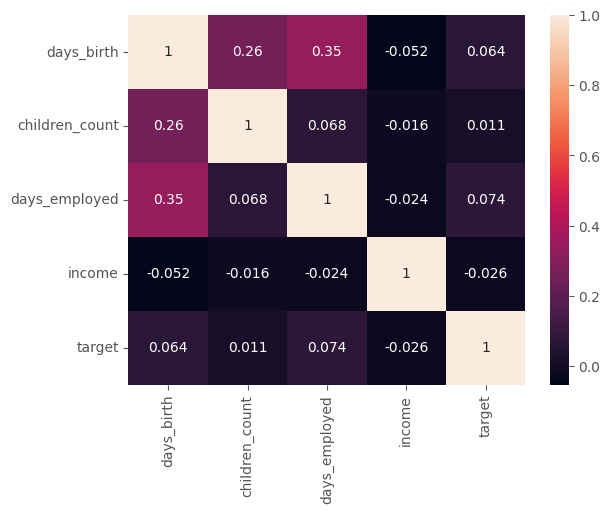

In [83]:
sns.heatmap(cred_app_target_df_corr, annot=True)

<Axes: xlabel='days_birth', ylabel='children_count'>

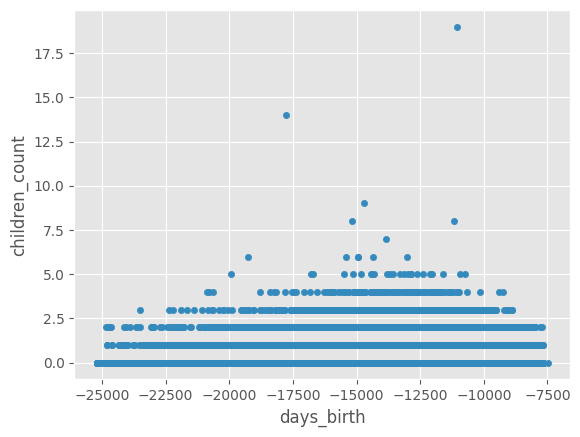

In [84]:
cred_app_target_df.plot(kind='scatter', x='days_birth', y='children_count')